In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [2]:
TRAINING_DIR = (r'C:\Users\Maïmouna COULIBALY\Desktop\M2 Data ingeener & data science\projet deep learning\train')

In [3]:
RAINING_DIR = (r'C:\Users\Maïmouna COULIBALY\Desktop\M2 Data ingeener & data science\projet deep learning\train')
IMG_SIZE = 224
BATCH_SIZE = 64
CLASS_NUM = 120

# Training IDG
train_idg = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range=0.1, 
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2)

# Training Gen
train_gen = train_idg.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)

# Test IDG
test_idg = ImageDataGenerator(rescale=1./255)

# Test Gen
test_gen = train_idg.flow_from_directory(
        TRAINING_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True,
        class_mode='categorical',
        subset='validation'
)

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


Found 16508 images belonging to 120 classes.


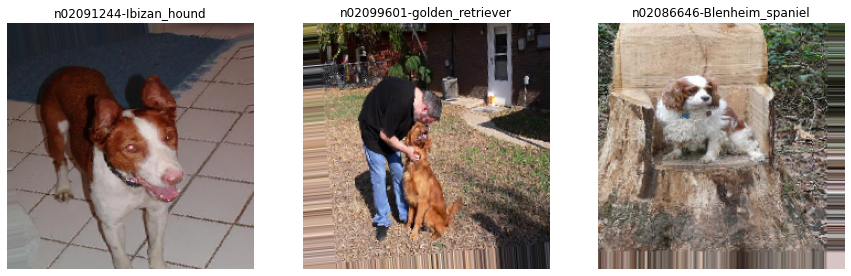

In [4]:
# Iterator
aug_iter = train_idg.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    subset='training'
)

# show horizontal images
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# get the labels of the flow classes from directory
def getLabel(index):
    return (list(aug_iter.class_indices.keys())[list(aug_iter.class_indices.values()).index(index)])

# show 3 images
for i in range(3):
    
    obj = next(aug_iter)
    
    # we get the index of each class
    class_index = np.argmax(obj[1])
    
    # get generator images
    image = obj[0]

    # show 3 images
    ax[i].imshow(image.reshape(IMG_SIZE, IMG_SIZE, 3))
    ax[i].set_title(getLabel(class_index))
    ax[i].axis('off')

In [5]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# ===  ===================
base_model = keras.applications.InceptionV3(
    weights = 'imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False
# ===  ===================

# === ===================
x = base_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(CLASS_NUM, activation='softmax')(x)


model = keras.Model(base_model.input, outputs)
# ===  ===================

# 
for layer in base_model.layers:
    layer.trainable = False

# 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()

87916544/87910968 [==============================] - 54s 1us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_____________________

In [6]:
history = model.fit(
    train_gen,
    steps_per_epoch=80,  
    epochs=3,
    verbose=1,
    validation_data=test_gen,
    validation_steps=50
)

Epoch 1/3
80/80 [==============================] - 505s 6s/step - loss: 2.1005 - accuracy: 0.5485 - val_loss: 3.5962 - val_accuracy: 0.5556
Epoch 2/3
80/80 [==============================] - 488s 6s/step - loss: 1.5589 - accuracy: 0.6540 - val_loss: 2.1739 - val_accuracy: 0.6594
Epoch 3/3
80/80 [==============================] - 578s 7s/step - loss: 1.3456 - accuracy: 0.6852 - val_loss: 1.8422 - val_accuracy: 0.6741


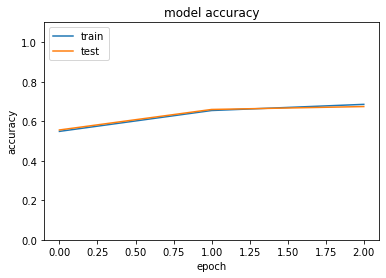

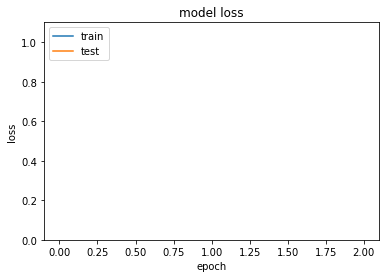

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()

Found 4072 images belonging to 120 classes.


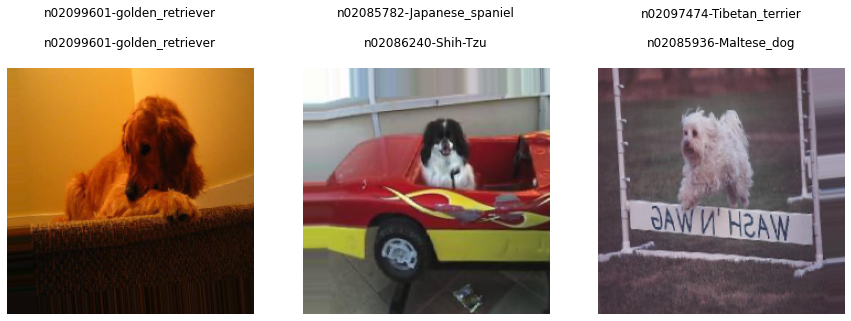

In [8]:

aug_iter = train_idg.flow_from_directory(
        TRAINING_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=1,
        class_mode='categorical',
        subset='validation'
)


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))


def getLabel(index):
    return (list(aug_iter.class_indices.keys())[list(aug_iter.class_indices.values()).index(index)])


for i in range(3):

    obj = next(aug_iter)
    
    
    class_index = np.argmax(obj[1])
    
   
    image = obj[0]
    
   
    real = getLabel(class_index)
   
    pred = getLabel(np.argmax(model.predict([image])))
    
   
    ax[i].imshow(image.reshape(IMG_SIZE, IMG_SIZE, 3))
    ax[i].set_title(real+"\n\n"+pred+"\n")
    ax[i].axis('off')